In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import os

**Step 1:Data Load**

objective: Load images and labels from the dataset directory

explaination:



*   We load all images from subfolders(each folder= class

*   Resize all images to (64,64)for uniformity



*   store images in X






In [ ]:
#define dataset path
data_dir = "/content/drive/MyDrive/Day1/plant_disease"
categories = os.listdir(data_dir)

#load images and labels
images = []
labels = []

for category in categories:
  print(category)
  category_dir = os.path.join(data_dir,category)
  for img_name in os.listdir(category_dir):
    img_path = os.path.join(category_dir,img_name)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img,(64,64)) #resize to uniform size
      images.append(img)
      labels.append(category)


#convert to numpy arrays
X = np.array(images)
Y = np.array(labels)

print("labels",np.unique(Y))
print("Data shape:",X.shape)

Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
labels ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
Data shape: (780, 64, 64, 3)


In [ ]:
#count images per class
class_counts = pd.Series(labels).value_counts()
print("Class Distribution")
print(class_counts)



Class Distribution
Potato___Early_blight            250
Potato___Late_blight             150
Potato___healthy                 140
Pepper__bell___Bacterial_spot    120
Pepper__bell___healthy           120
Name: count, dtype: int64


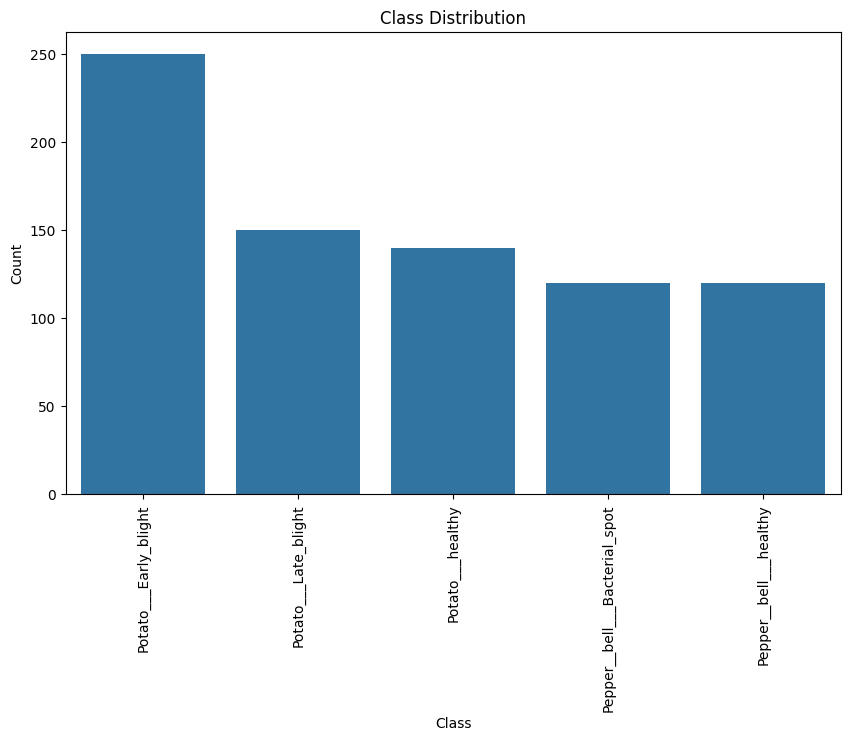

In [ ]:
#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [ ]:
# remove corrupted images if any
valid_images =[]
valid_labels =[]

for img, label in zip(X, Y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

X = np.array(valid_images)
Y = np.array(valid_labels)


print("Cleaned Data Shape:",X.shape)

Cleaned Data Shape: (780, 64, 64, 3)


**Step 4: Data Manipulation label Encoding**

objective:Conert class labels(strings) to numeric form

In [ ]:
#Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(Y)

#save class names for later use
class_names = le.classes_

print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 

**Step:5 Data Visualization**

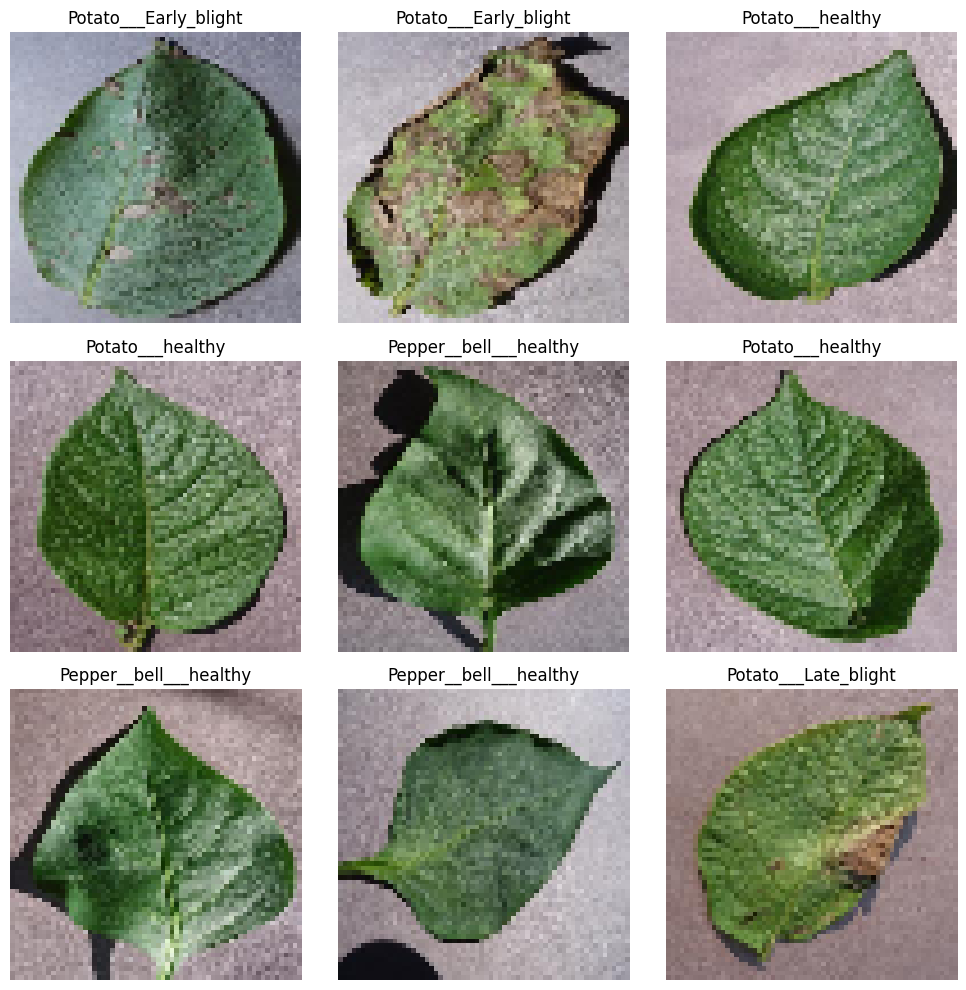

In [ ]:
# show sample images
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(X))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(X[idx],cv2.COLOR_BGR2RGB)) #Conert BGR to RGB

  plt.title(class_names[y_encoded[idx]])
  plt.axis("off")
plt.tight_layout()
plt.show()

**Step :6 Feature engineering(color histograms)**

objective:Extract features from images using color histograms


In [ ]:
def extract_color_histogram(image, bins=(8,8,8)):
  #convert to HSV color space
  image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist =cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
  hist = cv2.normalize(hist,hist).flatten()
  return hist

#extractt features
hist_features =[extract_color_histogram(img) for img in X]
X_features = np.array(hist_features)


**Step 7:Model Selection:Logistic Regression/SVM**

objective:choose a model for classification

In [ ]:
#choose model
#model = LogisticRegression(max_iter=1000)
model = SVC(kernel='rbf',C=10, gamma='scale')

**step 8: training model**

In [ ]:
#train/test split
X_train,X_test,y_train,y_test = train_test_split(X_features,y_encoded,test_size=0.2,random_state=42)

#train model
model.fit(X_train,y_train)

#predict
y_pred = model.predict(X_test)

**step: 9 Model Evaluation**

Accuracy: 0.8782051282051282
F1 Score: 0.8796457102471255


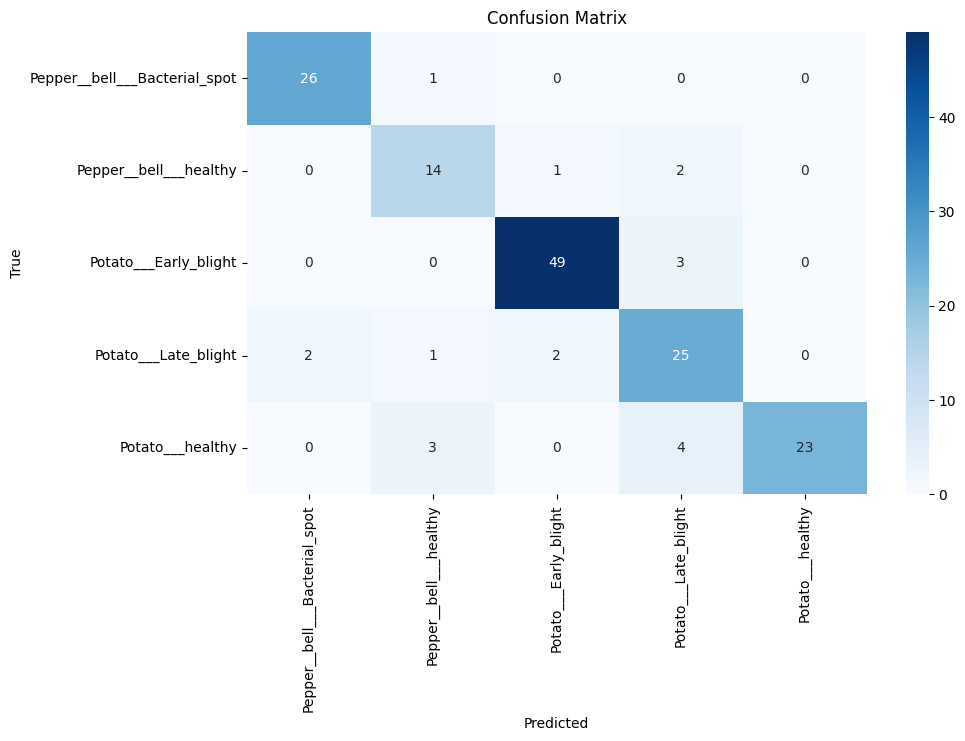

Classification Report:
                                precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.93      0.96      0.95        27
       Pepper__bell___healthy       0.74      0.82      0.78        17
        Potato___Early_blight       0.94      0.94      0.94        52
         Potato___Late_blight       0.74      0.83      0.78        30
             Potato___healthy       1.00      0.77      0.87        30

                     accuracy                           0.88       156
                    macro avg       0.87      0.87      0.86       156
                 weighted avg       0.89      0.88      0.88       156



In [ ]:
from sklearn.metrics import accuracy_score,f1_score ,confusion_matrix, classification_report
#accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)


f1 = f1_score(y_test,y_pred, average='weighted')
print("F1 Score:",f1)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)

#plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#classification report
cr = classification_report(y_test,y_pred,target_names=class_names)
print("Classification Report:\n",cr)